In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

In [2]:
def Farey(n):
    """Return the nth Farey sequence, ascending."""
    seq=[[0,1]]
    a, b, c, d = 0, 1, 1 , n
    while c <= n :
        k = int ((n + b)/ d)
        a, b, c, d = c, d, k*c - a, k*d - b
        seq.append([a,b])
    return seq

In [3]:
def resonance_lines_old(n, col='blue', l_width = 0.5):
    FN = Farey(n)
    linewidth = l_width
    
    for f in FN:
        h, k = f            # Node h/k on the axes
        for sf in FN:
            p, q = sf
            c = float(p*h)
            a = float(k*p)  # Resonance line a Qx + b Qy = c linked to p/q
            b = float(q-k*p)
            if a>0:
                plt.plot(x, c/a - x*b/a, color=col, lw=linewidth)
                plt.plot(x, c/a + x*b/a, color=col, lw=linewidth)
                plt.plot(c/a - x*b/a, x, color=col, lw=linewidth)
                plt.plot(c/a + x*b/a, x, color=col, lw=linewidth)
                plt.plot(c/a - x*b/a, 1-x, color=col, lw=linewidth)
                plt.plot(c/a + x*b/a, 1-x, color=col, lw=linewidth)
            if q==k and p==1: # FN elements below 1/k
                break
                
    return 0

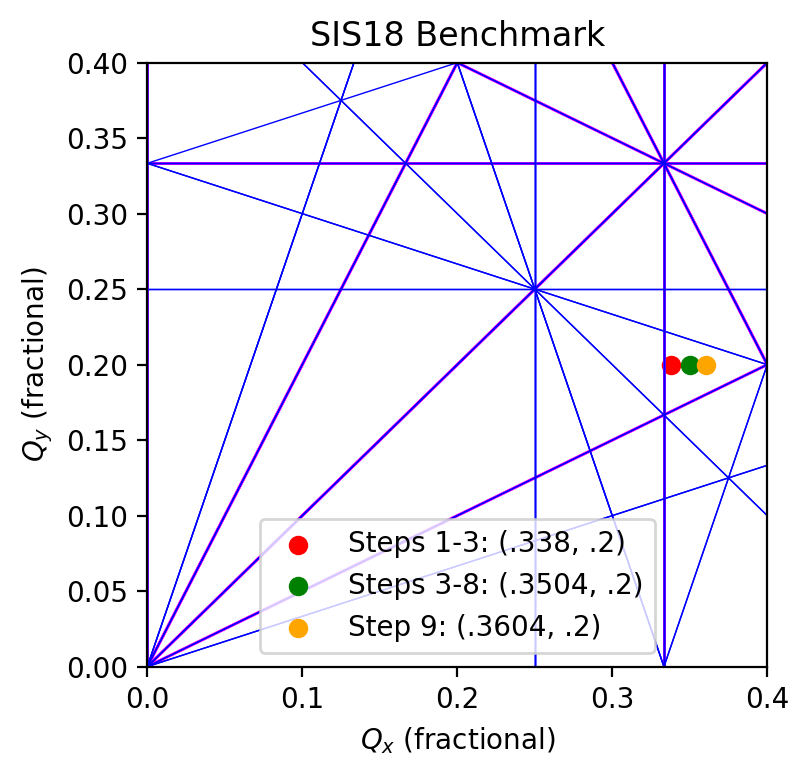

In [4]:
# SIS18 Benchmark
fig = plt.figure(figsize=(4, 4), dpi= 200, facecolor='w', edgecolor='k')
ax = plt.axes()
plt.ylim((0,0.4))
plt.xlim((0,0.4))
plt.xlabel('$Q_x$ (fractional)')
plt.ylabel('$Q_y$ (fractional)')
x = np.linspace(0, 1, 1000)

resonance_lines_old(3, 'magenta', 1)
resonance_lines_old(4, 'blue', 0.5)
plt.scatter( .338, .2, color='red', label='Steps 1-3: (.338, .2)')       
plt.scatter(.3504, .2,  color='green', label='Steps 3-8: (.3504, .2)')   
plt.scatter(.3604, .2, color='orange', label='Step 9: (.3604, .2)')   

plt.legend()
plt.title('SIS18 Benchmark')
fig.savefig('SIS18.png')
plt.show()

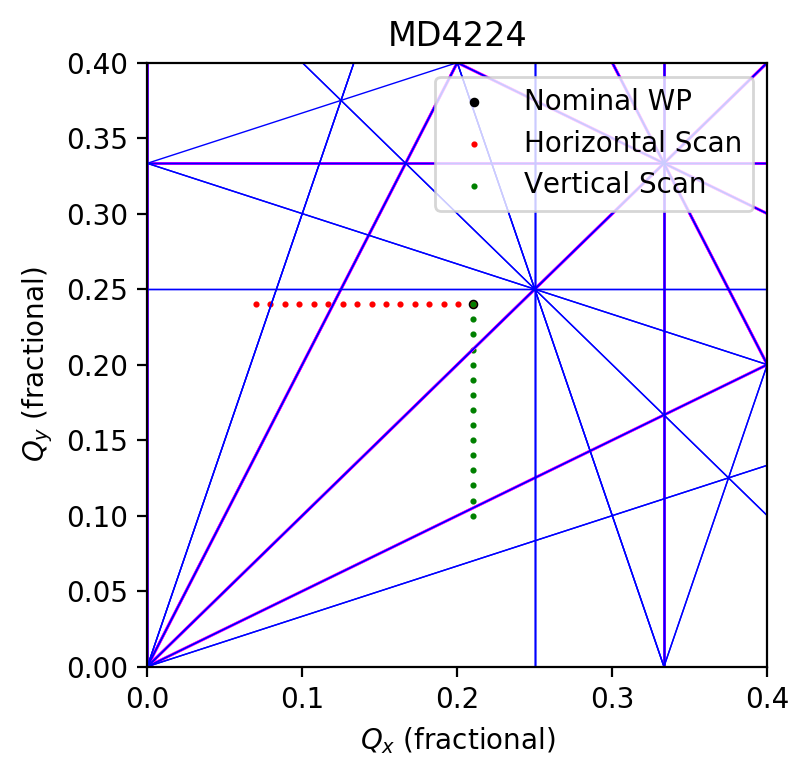

In [5]:
# MD4224
fig = plt.figure(figsize=(4, 4), dpi= 200, facecolor='w', edgecolor='k')
ax = plt.axes()
plt.ylim((0,0.4))
plt.xlim((0,0.4))
plt.xlabel('$Q_x$ (fractional)')
plt.ylabel('$Q_y$ (fractional)')
x = np.linspace(0, 1, 1000)

resonance_lines_old(3, 'magenta', 1)
resonance_lines_old(4, 'blue', 0.5)
#resonance_lines(5, 'green', 0.33)

# H scan
x_dat = np.linspace(0.07, 0.21, 16)
y_dat = 0.24 * np.ones(16)
# V scan
y_dat_2 = np.linspace(0.10, 0.24, 15)
x_dat_2 = 0.21 * np.ones(15)

#plt.xlim()

plt.scatter(0.21, 0.24, color='k', label='Nominal WP', s=6)
plt.scatter(x_dat, y_dat, color='red', label='Horizontal Scan', s = 1.5)  
plt.scatter(x_dat_2, y_dat_2, color='green', label='Vertical Scan', s=1.5)      


plt.legend(loc=1)
plt.title('MD4224')
fig.savefig('MD4224.png')
plt.show()

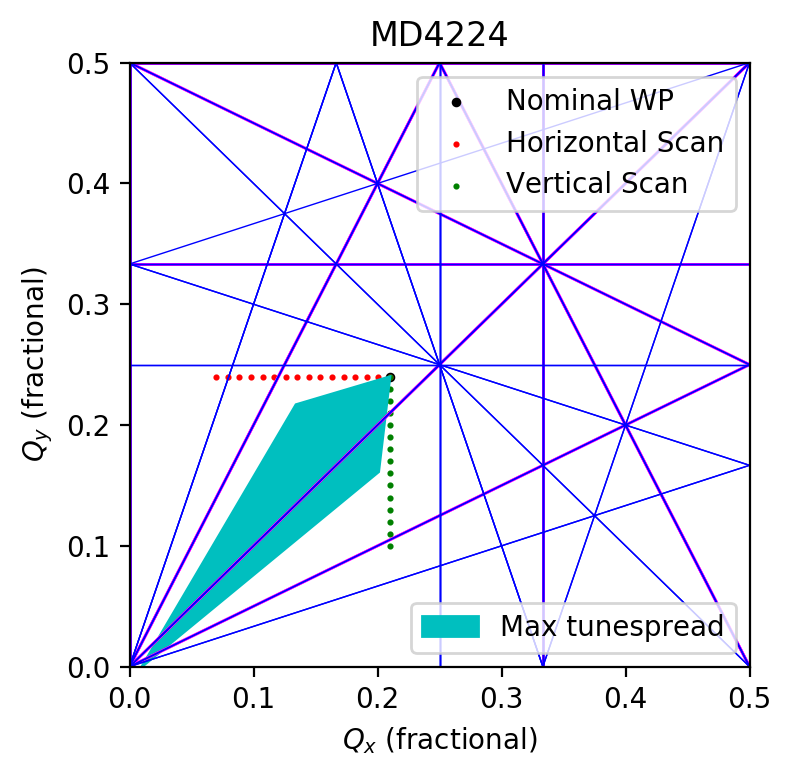

In [6]:
fig = plt.figure(figsize=(4, 4), dpi= 200, facecolor='w', edgecolor='k')
fig.tight_layout()

ax = plt.axes()
plt.ylim((0,0.5))
plt.xlim((0,0.5))
plt.xlabel('$Q_x$ (fractional)')
plt.ylabel('$Q_y$ (fractional)')
x = np.linspace(0, 1, 1000)

resonance_lines_old(3, 'magenta', 1)
resonance_lines_old(4, 'blue', 0.5)
#resonance_lines_old(5, 'green', 0.33)

# H scan
x_dat = np.linspace(0.07, 0.21, 16)
y_dat = 0.24 * np.ones(16)
# V scan
y_dat_2 = np.linspace(0.10, 0.24, 15)
x_dat_2 = 0.21 * np.ones(15)

#plt.xlim()

plt.scatter(0.21, 0.24, color='k', label='Nominal WP', s=6)
plt.scatter(x_dat, y_dat, color='red', label='Horizontal Scan', s = 1.5)  
plt.scatter(x_dat_2, y_dat_2, color='green', label='Vertical Scan', s=1.5)    

Qx = 0.21
Qy = 0.24
dq = [0.2,0.24] # calculated maximum tuneshift
radius = 0.8 * np.sqrt(dq[0]**2 + dq[1]**2)
angle  = np.arctan(.24/.2)
angle_offset = 10 * np.pi / 180 
poly = ([Qx-dq[0]+radius*np.cos(angle+angle_offset), Qy-dq[1]+radius*np.sin(angle+angle_offset)], [Qx-dq[0], Qy-dq[1]], [Qx-dq[0]+radius*np.cos(angle-angle_offset), Qy-dq[1]+radius*np.sin(angle-angle_offset)], [Qx, Qy]  )
patch = patches.Polygon(poly, True, color='c')
#plot.add_collection(patch)

ax.add_patch(patch)
patch_label = patches.Patch(color='c', label='Max tunespread')

plt.xlim()

first_legend = plt.legend(handles=[patch_label], loc=4)

# Add the legend manually to the current Axes.
ax = plt.gca().add_artist(first_legend)

plt.legend(loc=1)
plt.title('MD4224')
fig.savefig('MD4224_footprint.png')
plt.show()

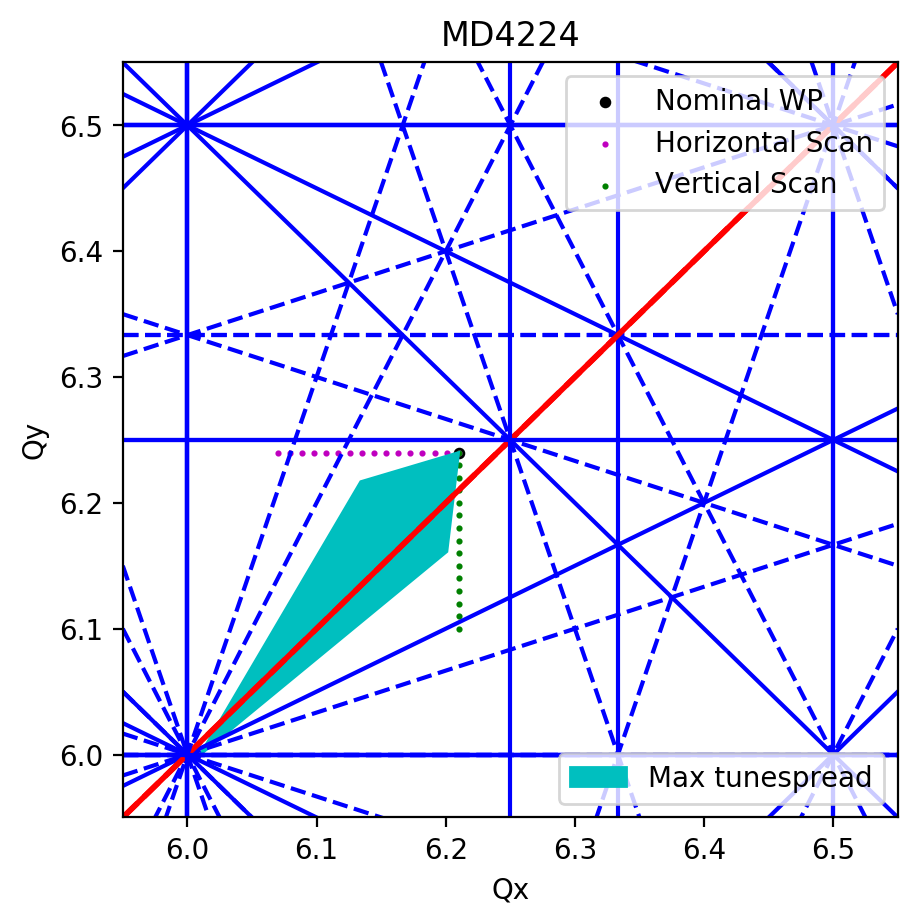

In [13]:
from tune_diagram import resonance_lines

resonances = resonance_lines((5.95, 6.55),(5.95, 6.55),(1,2,3,4),10)
fig, ax = plt.subplots(1, figsize=(5,5), dpi= 200, facecolor='w', edgecolor='k')
resonances.plot_resonance(fig)

# H scan
x_dat = np.linspace(6.07, 6.21, 16)
y_dat = 6.24 * np.ones(16)
# V scan
y_dat_2 = np.linspace(6.10, 6.24, 15)
x_dat_2 = 6.21 * np.ones(15)

#plt.xlim()

plt.scatter(6.21, 6.24, color='k', label='Nominal WP', s=10)
plt.scatter(x_dat, y_dat, color='m', label='Horizontal Scan', s = 1.5)  
plt.scatter(x_dat_2, y_dat_2, color='g', label='Vertical Scan', s=1.5)    

Qx = 6.21
Qy = 6.24
dq = [0.2,0.24] # calculated maximum tuneshift
radius = 0.8 * np.sqrt(dq[0]**2 + dq[1]**2)
angle  = np.arctan(.24/.2)
# angle_offset = 10 * np.pi / 180 
angle_offset = 10 * np.pi / 180  
poly = ([Qx-dq[0]+radius*np.cos(angle+angle_offset), Qy-dq[1]+radius*np.sin(angle+angle_offset)], [Qx-dq[0], Qy-dq[1]], [Qx-dq[0]+radius*np.cos(angle-angle_offset), Qy-dq[1]+radius*np.sin(angle-angle_offset)], [Qx, Qy]  )
patch = patches.Polygon(poly, True, color='c')
#plot.add_collection(patch)

ax.add_patch(patch)
patch_label = patches.Patch(color='c', label='Max tunespread')

plt.xlim()

first_legend = plt.legend(handles=[patch_label], loc=4)

# Add the legend manually to the current Axes.
ax = plt.gca().add_artist(first_legend)

plt.legend(loc=1)
plt.title('MD4224')

fig.savefig('MD4224_footprint_2.png')

Text(0.5,1,'MD4224')

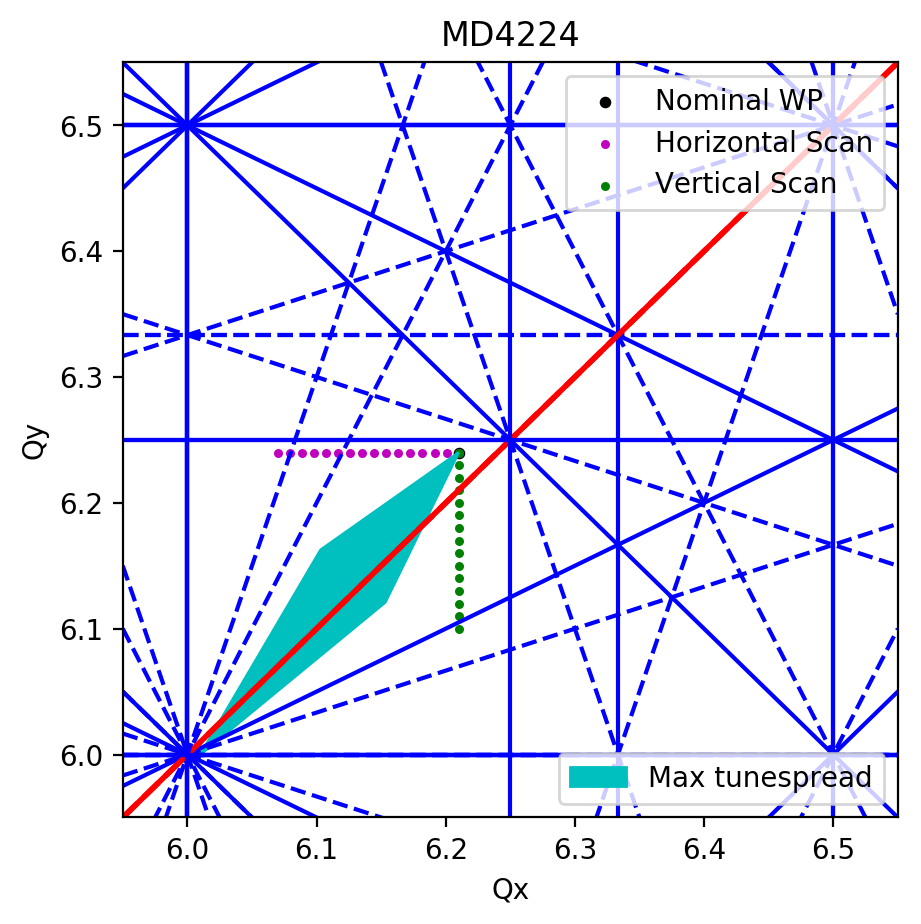

In [33]:
from tune_diagram import resonance_lines

resonances = resonance_lines((5.95, 6.55),(5.95, 6.55),(1,2,3,4),10)
fig, ax = plt.subplots(1, figsize=(5,5), dpi= 200, facecolor='w', edgecolor='k')
resonances.plot_resonance(fig)

# H scan
x_dat = np.linspace(6.07, 6.21, 16)
y_dat = 6.24 * np.ones(16)
# V scan
y_dat_2 = np.linspace(6.10, 6.24, 15)
x_dat_2 = 6.21 * np.ones(15)

#plt.xlim()

plt.scatter(6.21, 6.24, color='k', label='Nominal WP', s=10)
plt.scatter(x_dat, y_dat, color='m', label='Horizontal Scan', s = 5)  
plt.scatter(x_dat_2, y_dat_2, color='g', label='Vertical Scan', s = 5)    

# Tune footprint
Qx = 6.21
Qy = 6.24
dq = [0.2,0.24] # calculated maximum tuneshift
radius = 0.6 * np.sqrt(dq[0]**2 + dq[1]**2)
angle  = np.arctan(.24/.2)
angle_offset = 10 * np.pi / 180  

mid_right_x = Qx-dq[0] + radius*np.cos(angle+angle_offset)
mid_right_y = Qy-dq[1] + radius*np.sin(angle+angle_offset)

lowest_point_x = Qx-dq[0]
lowest_point_y = Qy-dq[1]

mid_left_x = Qx-dq[0] + radius*np.cos(angle-angle_offset)
mid_left_y = Qy-dq[1] + radius*np.sin(angle-angle_offset)

top_point_x = Qx
top_point_y = Qy

poly = ( [mid_right_x, mid_right_y], [lowest_point_x, lowest_point_y ],  [mid_left_x, mid_left_y], [top_point_x, top_point_y])
patch = patches.Polygon(poly, True, color='c')

ax.add_patch(patch)
patch_label = patches.Patch(color='c', label='Max tunespread')

plt.xlim()

first_legend = plt.legend(handles=[patch_label], loc=4)

# Add the legend manually to the current Axes.
ax = plt.gca().add_artist(first_legend)

plt.legend(loc=1)
plt.title('MD4224')

# fig.savefig('MD4224_footprint_2.png')

In [9]:
from tune_diagram import resonance_lines
#tune_diagram = resonance_lines([3.9,4.6],[3.9,4.6], [1,2,3,4], 16)
fig = tune_diagram.plot_resonance()
dq=[0.454,0.526] # calculated maximum tuneshift
plot = fig.add_subplot(111)
fig.suptitle('Tune Diagram', fontsize='20')
Qx = 4.4
Qy = 4.5
radius = 0.8 * np.sqrt(dq[0]**2 + dq[1]**2)
angle  = np.arctan(dqy/dqx)
angle_offset = 10 * np.pi / 180 
poly = ([Qx-dq[0], Qy-dq[1]], [Qx-dq[0]+radius*np.cos(angle-angle_offset), Qy-dq[1]+radius*np.sin(angle-angle_offset)],  [Qx, Qy] , [Qx-dq[0]+radius*np.cos(angle+angle_offset), Qy-dq[1]+radius*np.sin(angle+angle_offset)])
patch = PatchCollection([Polygon(poly, True)], color='b')
plot.add_collection(patch)
plt.savefig('spread.png',orientation='portrait')

NameError: name 'tune_diagram' is not defined